# MadMiner Parton-Level Analysis for $W\gamma$: Step 2 - Analysis

Johann Brehmer, Felix Kling, Kyle Cranmer 2018

In this tutorial we'll demonstrate how to use MadMiner to generate train and test samples for the Information Geometry methods introduced in the following papers:
- J. Brehmer, K. Cranmer, F. Kling, T. Plehn: ["Better Higgs Measurements Through Information Geometry"](https://arxiv.org/abs/1612.05261)
- J. Brehmer, F. Kling, T. Plehn, T.M.P. Tait: ["Better Higgs-CP Tests Through Information Geometry"](https://arxiv.org/abs/1712.02350)

## 0. Preparations

In [1]:
import sys
import os
madminer_src_path = "/Users/felixkling/Documents/GitHub/madminer"
sys.path.append(madminer_src_path)

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.fisherinformation import project_information,profile_information

from madminer.plotting import plot_fisher_information_contours_2d
from madminer.plotting import plot_fisherinfo_barplot
from madminer.plotting import plot_distribution_of_information

from madminer.sampling import SampleAugmenter
from madminer.sampling import constant_benchmark_theta, multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas
from madminer.ml import MLForge, EnsembleForge


## 8. FisherInfo for Processed Data

In [2]:
#Setup MadFisher
fisher = FisherInformation('data/madminer_wgamma_observables_1k.h5', debug=False)

#Run MadFisher
fi_det_mean_1k_all, fi_det_cov_1k_all = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.], luminosity=300*1000.,
    model_file='models/samples_1k/sally_ensemble_all',
    unweighted_x_sample_file='data/samples_1k/x_test.npy'
)
#Run MadFisher Truth
fi_pl_full_1k = fisher.calculate_fisher_information_full_truth(theta=[0.,0.],luminosity=300*1000.)






#Setup MadFisher
fisher = FisherInformation('data/madminer_wgamma_observables_10k.h5', debug=False)

#Run MadFisher
fi_det_mean_10k_all, fi_det_cov_10k_all = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.], luminosity=300*1000.,
    model_file='models/samples_10k/sally_ensemble_all',
    unweighted_x_sample_file='data/samples_10k/x_test.npy'
)
#Run MadFisher Truth
fi_pl_full_10k = fisher.calculate_fisher_information_full_truth(theta=[0.,0.],luminosity=300*1000.)








#Setup MadFisher
fisher = FisherInformation('data/madminer_wgamma_observables_100k.h5', debug=False)

#Run MadFisher
fi_det_mean_100k_all, fi_det_cov_100k_all = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.], luminosity=300*1000.,
    model_file='models/samples_100k/sally_ensemble_all',
    unweighted_x_sample_file='data/samples_100k/x_test.npy'
)
#Run MadFisher Truth
fi_pl_full_100k = fisher.calculate_fisher_information_full_truth(theta=[0.,0.],luminosity=300*1000.)







#Setup MadFisher
fisher = FisherInformation('data/madminer_wgamma_observables_1M.h5', debug=False)

#Run MadFisher
fi_det_mean_1M_all, fi_det_cov_1M_all = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.], luminosity=300*1000.,
    model_file='models/samples_1M/sally_ensemble_all',
    unweighted_x_sample_file='data/samples_1M/x_test.npy'
)
#Run MadFisher Truth
fi_pl_full_1M = fisher.calculate_fisher_information_full_truth(theta=[0.,0.],luminosity=300*1000.)

16:57  
16:57  ------------------------------------------------------------
16:57  |                                                          |
16:57  |  MadMiner v2018.10.30                                    |
16:57  |                                                          |
16:57  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
16:57  |                                                          |
16:57  ------------------------------------------------------------
16:57  
16:57  Loading data from data/madminer_wgamma_observables_1k.h5
16:57  Found 2 parameters:
16:57     CWL2 (LHA: dim6 2, maximal power in squared ME: (2,), range: (-50.0, 50.0))
16:57     CPWL2 (LHA: dim6 5, maximal power in squared ME: (2,), range: (-50.0, 50.0))
16:57  Found 6 benchmarks:
16:57     sm: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
16:57     w: CWL2 = 20.00, CPWL2 = 0.00e+00
16:57     morphing_basis_vector_2: CWL2 = 36.56, CPWL2 = -3.86e+01
16:57     morphing_basis_vector_3: CWL2 = -4.58e+01, CPWL2

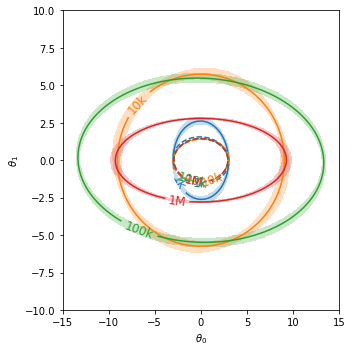

In [3]:
#Plot FisherInfo
fignn = plot_fisher_information_contours_2d(
    [fi_det_mean_1k_all,fi_det_mean_10k_all,fi_det_mean_100k_all,fi_det_mean_1M_all, fi_pl_full_1k,fi_pl_full_10k, fi_pl_full_100k,fi_pl_full_1M],
    [fi_det_cov_1k_all ,fi_det_cov_10k_all ,fi_det_cov_100k_all ,fi_det_cov_1M_all , None         ,None          , None           ,None         ],
    colors=[u'C0',u'C1',u'C2',u'C3',u'C0',u'C1',u'C2',u'C3'],
    linestyles=["solid","solid","solid","solid","dashed","dashed","dashed","dashed"],
    inline_labels=["1k","10k","100k","1M","1k","10k","100k","1M"],
    xrange=(-15.,15.),
    yrange=(-10.,10.),
)